In [1]:
import matplotlib.pyplot as plt
import sys
import os
import importlib

In [2]:
# Add the parent directory to the path to import src as a package
sys.path.insert(0, os.path.abspath('..'))
from src import dataloader
importlib.reload(dataloader)
from src import utils
from src import export
importlib.reload(export)
from src.export import export_to_xarray 



%matplotlib widget 
plot_flag = False

In [3]:
import xarray as xr

# Load example data for one dyad

In [4]:
dyad_id = "W030"
lowcut=1.0
highcut=40.0
eeg_filter_type = 'iir' # choose 'fir' or 'iir' for EEG filtering
q=8  # decimation factor
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", 
                                                    dyad_id = dyad_id, 
                                                    load_eeg=True, 
                                                    load_et=True, 
                                                    lowcut=lowcut, 
                                                    highcut=highcut, 
                                                    eeg_filter_type=eeg_filter_type, 
                                                    interpolate_et_during_blinks_threshold=0.3,
                                                    median_filter_size=64,
                                                    low_pass_et_order=351,
                                                    et_pos_cutoff=128,
                                                    et_pupil_cutoff=4,
                                                    pupil_model_confidence=0.9,
                                                    decimate_factor=q,
                                                    plot_flag=plot_flag)

Detected events: [{'name': 'Brave', 'start': 387.806640625, 'duration': 59.3310546875}, {'name': 'Peppa', 'start': 248.5107421875, 'duration': 59.6328125}, {'name': 'Incredibles', 'start': 318.3603515625, 'duration': 59.212890625}, {'name': 'Talk_1', 'start': 594.4892578125, 'duration': 181.0556640625}, {'name': 'Talk_2', 'start': 836.7275390625, 'duration': 181.056640625}]
Applying iir filters to EEG data.
Reseting the EEG time to the start of Peppa
ET time range: 241.59s to 461.89s
Events from ET annotations:
[None 'Peppa' 'Incredibles' 'Brave']
Reseting the ET time to the start of Peppa
Processing member: ch, blink column: ET_ch_blinks
Processing member: cg, blink column: ET_cg_blinks
Column ET_ch_blinks contains NaN values, applying forward fill before decimation.
Column ET_cg_blinks contains NaN values, applying forward fill before decimation.
Event Peppa start times are consistent within 0.0 seconds.
Event Incredibles differ in start times by: abs(0.0078125) seconds.
Event Brave 

In [5]:
multimodal_data.data.columns

Index(['time', 'time_idx', 'ET_event', 'EEG_events', 'diode', 'ECG_ch',
       'ECG_cg', 'IBI_ch', 'IBI_cg', 'EEG_ch_Fp1', 'EEG_ch_Fp2', 'EEG_ch_F7',
       'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4', 'EEG_ch_F8', 'EEG_ch_M1',
       'EEG_ch_T3', 'EEG_ch_C3', 'EEG_ch_Cz', 'EEG_ch_C4', 'EEG_ch_T4',
       'EEG_ch_M2', 'EEG_ch_T5', 'EEG_ch_P3', 'EEG_ch_Pz', 'EEG_ch_P4',
       'EEG_ch_T6', 'EEG_ch_O1', 'EEG_ch_O2', 'EEG_cg_Fp1', 'EEG_cg_Fp2',
       'EEG_cg_F7', 'EEG_cg_F3', 'EEG_cg_Fz', 'EEG_cg_F4', 'EEG_cg_F8',
       'EEG_cg_M1', 'EEG_cg_T3', 'EEG_cg_C3', 'EEG_cg_Cz', 'EEG_cg_C4',
       'EEG_cg_T4', 'EEG_cg_M2', 'EEG_cg_T5', 'EEG_cg_P3', 'EEG_cg_Pz',
       'EEG_cg_P4', 'EEG_cg_T6', 'EEG_cg_O1', 'EEG_cg_O2', 'ET_ch_x',
       'ET_ch_y', 'ET_ch_pupil', 'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y',
       'ET_cg_pupil', 'ET_cg_blinks', 'events'],
      dtype='str')

# Get the selected data modality for a given event with a time margin on both ends 

Event 'Peppa' starts at 0.00s and ends at 59.63s
Selected time range with ±10s margin: -10.00s to 69.63s
<xarray.DataArray 'W030 EEG ch Peppa with ±10s margin' (time: 10193, channel: 21)> Size: 2MB
array([[-97.45345145, -86.96672122, -39.96571836, ...,  -7.46349458,
         -3.64278855,   4.18598785],
       [-63.83729271, -51.04183786,  -7.15739937, ...,   4.03579056,
         -0.9017896 ,  10.2900968 ],
       [-44.46871673, -26.97992007,   9.66799152, ...,   9.56932999,
          0.55484251,  14.33467554],
       ...,
       [ 35.87007552,  16.18397873,  99.19952674, ...,  36.33018111,
          6.54528401,  28.1131186 ],
       [ 31.42516263,  14.15968767,  86.91312848, ...,   8.78991483,
         14.57440476,  19.36983445],
       [ -6.84919819, -19.11857816,  56.62971498, ..., -50.31087026,
         10.75834846,  13.97787912]], shape=(10193, 21))
Coordinates:
  * time     (time) float64 82kB -10.0 -9.992 -9.984 ... 69.61 69.62 69.62
  * channel  (channel) <U3 252B 'Fp1' 'Fp2' 'F

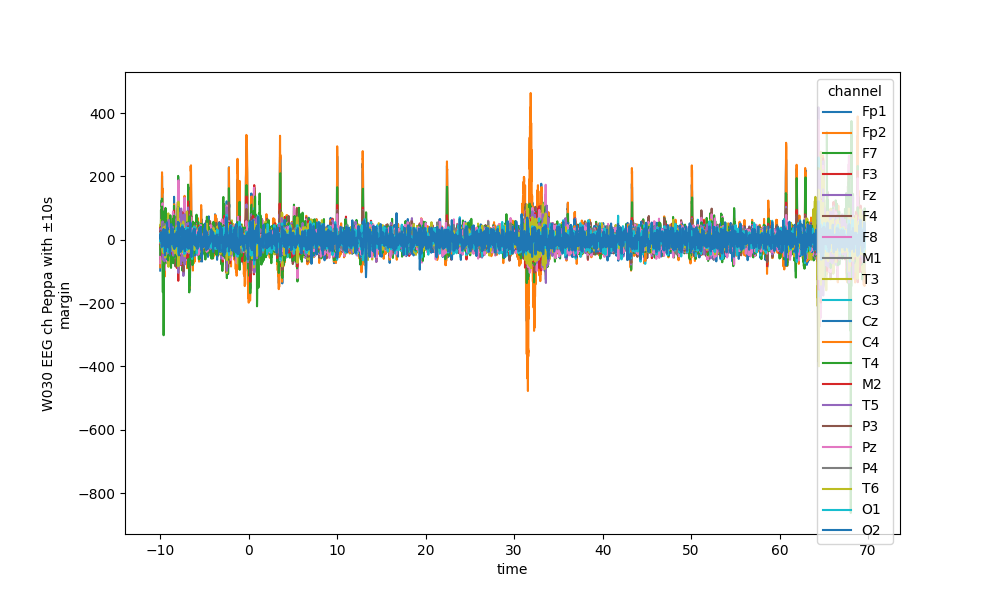

In [ ]:
time_margin = 10 # seconds
selected_event =  'Peppa' #'Incredibles' 'Peppa' 'Brave' 'Talk_1' 'Talk_2'
member = 'ch' #'cg'

selected_modality = 'EEG' # choose 'EEG', 'ECG', 'ET' , 'IBI' or 'diode' for modality to export to xarray (diode is the reference for checking the correctnes of event slicing)
selected_channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'M1', 'T3', 'C3', 'Cz', 'C4', 'T4', 'M2', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
#selected_modality = 'ET'
#selected_channels = ['x', 'y', 'pupil', 'blinks']

#selected_modality = 'ECG'
#selected_channels = ['ECG']

#selected_modality = 'IBI'
#selected_channels = ['IBI']
#selected_modality = 'diode'
#selected_channels = ['diode']

data_EEG_xr = export_to_xarray(multimodal_data = multimodal_data, 
                               selected_event=selected_event, 
                               selected_channels=selected_channels, 
                               selected_modality=selected_modality, 
                               member=member, 
                               time_margin=time_margin)
# print the xarray DataArray to verify its structure and metadata
print(data_EEG_xr)



# plot the retrieved EEG data using xarray's built-in plotting
plt.figure(figsize=(10, 6))
data_EEG_xr.plot.line(x='time', hue='channel')
plt.show()


In [7]:

# Plot the retrieved EEG data for the selected event and channels the same way as before to verify it looks correct
ev = multimodal_data.events[selected_event]
event_start = ev['start']
event_end = ev['start'] + ev['duration']

# find time range covering selected event with margin on both sides
recording_start = multimodal_data.data['time'].min()
recording_end = multimodal_data.data['time'].max()

selected_time = [
    max(recording_start, event_start - time_margin),
    min(recording_end, event_end + time_margin),
]

print(f"Event '{selected_event}' starts at {event_start:.2f}s and ends at {event_end:.2f}s")
print(f"Selected time range with ±{time_margin}s margin: {selected_time[0]:.2f}s to {selected_time[1]:.2f}s")

time, channels_EEG, data_EEG = multimodal_data.get_signals(
    mode='EEG',
    member=member,
    selected_channels=selected_channels,
    selected_times=selected_time
)
print(f"Retrieved EEG data shape: {data_EEG.shape}")  # Should be (n_channels, n_samples)
time, channels, diode_data = multimodal_data.get_signals(
                    mode='diode', 
                    selected_channels=['diode'],
                    selected_times=selected_time
                )  
plt.figure(figsize=(10, 6))
for i, ch_name in enumerate(channels_EEG):
    plt.plot(time, data_EEG[:,i], label=ch_name)
plt.plot(time, diode_data[:,0]*200, label='diode', color='k', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.title(f'EEG Signals for Selected Channels between {selected_time[0]:.2f}s and {selected_time[1]:.2f}s during {selected_event} Event')
plt.legend()
plt.show()

Event 'Incredibles' starts at 69.86s and ends at 129.06s
Selected time range with ±10s margin: 59.86s to 139.06s


TypeError: cannot unpack non-iterable NoneType object